In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sb
import datetime
from scipy.stats import linregress
import datetime

#set matplotlib params

plt.rcParams['font.size'] = 12

In [2]:
realestate_sales_df = pd.read_csv("aus-property-sales-sep2018-april2020.csv")
realestate_sales_df

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid
0,2018-09-18 00:00:00,NaN,Darling Point,Sydney,NSW,-33.869565,151.241317,3,unit,NSW1221,NSW180
1,2018-09-24 00:00:00,NaN,Darling Point,Sydney,NSW,-33.872179,151.239726,3,unit,NSW1221,NSW180
2,2018-09-26 00:00:00,1730000.0,Darling Point,Sydney,NSW,-33.868386,151.237471,2,unit,NSW1221,NSW180
3,2018-09-26 00:00:00,1928000.0,Darling Point,Sydney,NSW,-33.875465,151.236280,3,unit,NSW1221,NSW180
4,2018-10-02 00:00:00,1475000.0,Darling Point,Sydney,NSW,-33.875734,151.233575,3,unit,NSW1221,NSW180
...,...,...,...,...,...,...,...,...,...,...,...
320329,2019-09-09 00:00:00,NaN,Taylor,Canberra,ACT,-35.152128,149.099435,3,townhouse,ACT934,ACT
320330,2019-09-10 00:00:00,549900.0,Taylor,Canberra,ACT,-35.151968,149.107229,3,townhouse,ACT934,ACT
320331,2019-09-10 00:00:00,499900.0,Taylor,Canberra,ACT,-35.151968,149.107229,3,townhouse,ACT934,ACT
320332,2020-03-10 00:00:00,434000.0,Taylor,Canberra,ACT,-35.152617,149.103578,3,townhouse,ACT934,ACT


?pd.to_datetime

In [3]:
realestate_sales_df['date_sold'] = pd.to_datetime(realestate_sales_df['date_sold'], format="%Y-%m-%d %H:%M:%S")

In [4]:
realestate_sales_df['quarter'] = realestate_sales_df['date_sold'].dt.quarter

In [5]:
realestate_sales_df['month']= realestate_sales_df['date_sold'].dt.month

In [6]:
realestate_sales_df['year']= realestate_sales_df['date_sold'].dt.year

In [7]:
realestate_sales_df['date_sold'] = pd.to_datetime(realestate_sales_df['date_sold'], format="%Y-%m-%d %H:%M:%S")
realestate_sales_df['quarter'] = realestate_sales_df['date_sold'].dt.quarter
realestate_sales_df['year']= realestate_sales_df['date_sold'].dt.year

In [8]:
#Narrow data to WA only

wa_realestate_df = realestate_sales_df.loc[realestate_sales_df['state']=="WA"]

In [9]:
wa_realestate_df

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,quarter,month,year
54789,2019-02-06,120000.0,Kelmscott,Perth,WA,-32.118235,116.018271,3,unit,WA2915,WA321,1,2,2019
54790,2019-05-24,NaN,Kelmscott,Perth,WA,-32.117147,116.011979,3,unit,WA2915,WA321,2,5,2019
54791,2020-02-27,329000.0,Kelmscott,Perth,WA,-32.120796,116.019722,3,unit,WA2915,WA321,1,2,2020
54792,2020-06-23,159000.0,Kelmscott,Perth,WA,-32.110688,116.014602,2,unit,WA2915,WA321,2,6,2020
54793,2019-04-22,NaN,Piara Waters,Perth,WA,-32.137776,115.928161,3,unit,WA3112,WA321,2,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313743,2020-03-21,870000.0,Burswood,Perth,WA,-31.957961,115.895464,4,townhouse,WA3151,WA316,1,3,2020
313744,2020-05-11,NaN,Burswood,Perth,WA,-31.969290,115.896280,3,townhouse,WA3151,WA316,2,5,2020
313745,2019-04-20,NaN,Lathlain,Perth,WA,-31.970371,115.903924,3,townhouse,WA3334,WA316,2,4,2019
313746,2019-07-19,NaN,Lathlain,Perth,WA,-31.974653,115.906999,3,townhouse,WA3334,WA316,3,7,2019


In [10]:
wa_realestate_df.sort_values(['date_sold'], ascending = True) 

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,quarter,month,year
235071,2018-09-02,530000.0,East Victoria Park,Perth,WA,-31.989368,115.903813,3,house,WA3143,WA316,3,9,2018
202249,2018-09-02,170000.0,Armadale,Perth,WA,-32.143731,115.994765,3,house,WA3220,WA321,3,9,2018
228033,2018-09-02,NaN,Two Rocks,Perth,WA,-31.505544,115.599803,3,house,WA2518,WA309,3,9,2018
57108,2018-09-02,280000.0,Como,Perth,WA,-31.993275,115.873553,2,unit,WA3142,WA318,3,9,2018
54858,2018-09-02,155500.0,Maylands,Perth,WA,-31.935291,115.901328,1,unit,WA3156,WA314,3,9,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215228,2020-07-16,NaN,Bateman,Perth,WA,-32.049090,115.844721,4,house,WA3104,WA312,3,7,2020
229519,2020-07-16,670000.0,Clarkson,Perth,WA,-31.695755,115.721247,4,house,WA3199,WA309,3,7,2020
312607,2020-07-16,NaN,Maylands,Perth,WA,-31.941193,115.906177,2,townhouse,WA3156,WA314,3,7,2020
213000,2020-07-16,NaN,Kingsley,Perth,WA,-31.800630,115.785950,5,house,WA3187,WA371,3,7,2020


In [11]:
wa_realestate_df.property_type.unique()

array(['unit', 'house', 'townhouse'], dtype=object)

In [12]:
wa_realestate_df.suburb.unique()

array(['Kelmscott', 'Piara Waters', 'Armadale', 'Mount Richon',
       'Bayswater', 'Morley', 'Maylands', 'Embleton', 'Rivervale',
       'Cloverdale', 'Redcliffe', 'Belmont', 'Ascot', 'Canning Vale',
       'Willetton', 'Shelley', 'Parkwood', 'Riverton', 'Wilson',
       'Cannington', 'Ferndale', 'Bentley', 'Queens Park',
       'East Cannington', 'Lynwood', 'St James', 'Munster', 'Beeliar',
       'Atwell', 'Success', 'Coogee', 'Spearwood', 'Hamilton Hill',
       'North Coogee', 'Yangebup', 'Coolbellup', 'Leeming',
       'Hammond Park', 'Aubin Grove', 'Cockburn Central', 'Fremantle',
       'South Fremantle', "O'Connor", 'North Fremantle', 'Beaconsfield',
       'White Gum Valley', 'Martin', 'Thornlie', 'Gosnells', 'Maddington',
       'Beckenham', 'Woodvale', 'Joondalup', 'Duncraig', 'Greenwood',
       'Warwick', 'Hillarys', 'Heathridge', 'Mullaloo', 'Craigie',
       'Edgewater', 'Kingsley', 'Ocean Reef', 'Sorrento', 'Marmion',
       'Beldon', 'Kinross', 'Connolly', 'Currambine

In [13]:
totsales_suburb = wa_realestate_df['suburb'].value_counts()
totsales_suburb.head(30)

Baldivis          760
Canning Vale      558
Scarborough       479
Dianella          463
Morley            441
Thornlie          421
Ellenbrook        417
Rockingham        380
South Perth       366
East Perth        363
Maylands          362
Duncraig          360
Perth             349
Como              348
Gosnells          338
Bayswater         331
Willetton         319
Byford            319
Clarkson          310
Butler            293
Secret Harbour    292
Mount Lawley      291
Claremont         291
Wembley           290
Subiaco           273
Armadale          272
Port Kennedy      270
Ballajura         268
Waikiki           268
Rivervale         261
Name: suburb, dtype: int64

In [14]:
totsales_property = wa_realestate_df['property_type'].value_counts()
totsales_property

house        34299
unit          4138
townhouse     1224
Name: property_type, dtype: int64

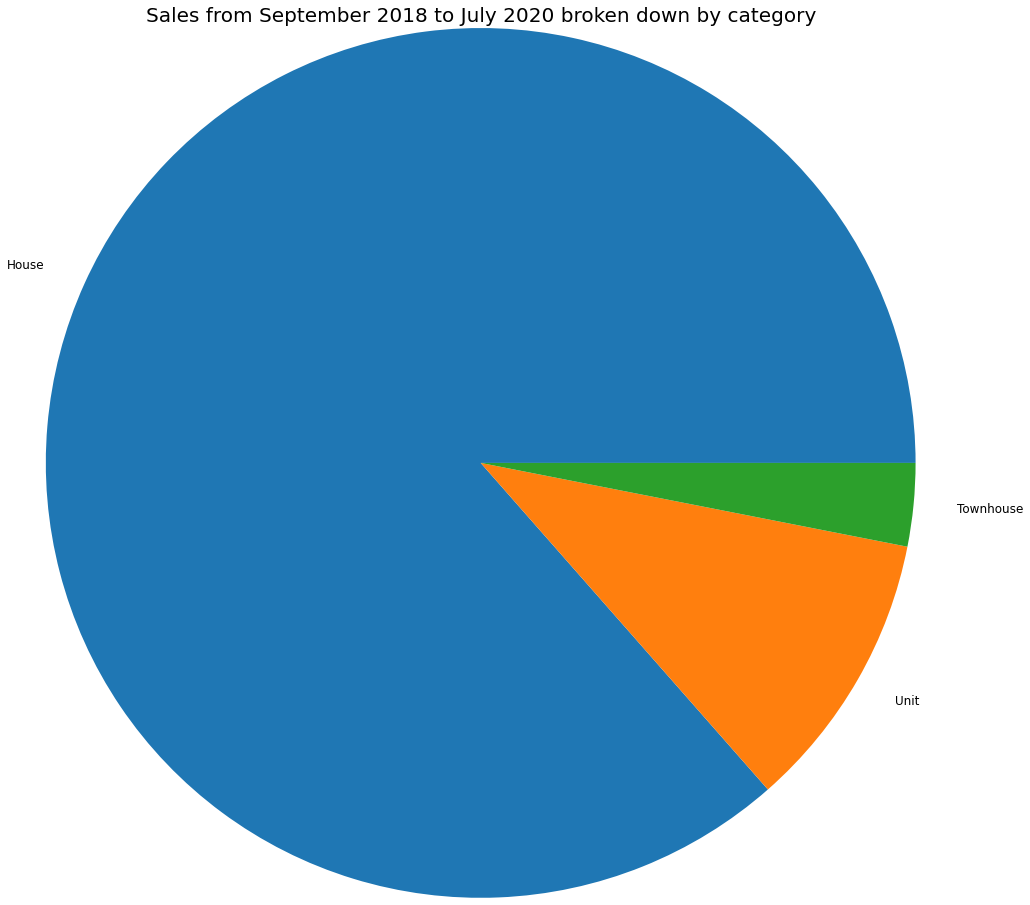

In [15]:
plt.figure(figsize=(12,10))
plt.pie(totsales_property, labels=['House','Unit', 'Townhouse'], radius = 2)
explode = (0, 0.05, 0.05,)
plt.title("Sales from September 2018 to July 2020 broken down by category", y= 1.3, fontsize=20)
plt.savefig('output/share_by_property_total_sales_2018_to_2020.jpeg')
plt.show()

In [16]:
print(wa_realestate_df.dtypes)

date_sold        datetime64[ns]
price                   float64
suburb                   object
city_name                object
state                    object
lat                     float64
lon                     float64
bedrooms                  int64
property_type            object
loc_pid                  object
lga_pid                  object
quarter                   int64
month                     int64
year                      int64
dtype: object


In [17]:
wa_realestate_df.price.isnull().sum().sum()

12995

# Break Dataframe into Separate Dataframes for Year

In [18]:
wa_realestate_2018df = wa_realestate_df.loc[wa_realestate_df['year'] == 2018] 
wa_realestate_2018df

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,quarter,month,year
54795,2018-10-08,169000.0,Armadale,Perth,WA,-32.147623,116.014992,2,unit,WA3220,WA321,4,10,2018
54796,2018-12-20,219000.0,Armadale,Perth,WA,-32.154939,116.010104,3,unit,WA3220,WA321,4,12,2018
54829,2018-10-23,144500.0,Bayswater,Perth,WA,-31.925058,115.932127,2,unit,WA2866,WA314,4,10,2018
54846,2018-10-05,405000.0,Morley,Perth,WA,-31.882650,115.894454,3,unit,WA2870,WA314,4,10,2018
54847,2018-11-20,NaN,Morley,Perth,WA,-31.890418,115.900652,2,unit,WA2870,WA314,4,11,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313690,2018-10-04,NaN,Mosman Park,Perth,WA,-32.004645,115.761122,3,townhouse,WA3100,WA375,4,10,2018
313701,2018-09-24,463500.0,East Victoria Park,Perth,WA,-31.980826,115.902409,3,townhouse,WA3143,WA316,3,9,2018
313708,2018-09-25,400000.0,Victoria Park,Perth,WA,-31.975596,115.892134,3,townhouse,WA3148,WA316,3,9,2018
313709,2018-10-29,620000.0,Victoria Park,Perth,WA,-31.971405,115.886967,3,townhouse,WA3148,WA316,4,10,2018


In [19]:
wa_realestate_2019df = wa_realestate_df.loc[wa_realestate_df['year'] == 2019] 
wa_realestate_2019df

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,quarter,month,year
54789,2019-02-06,120000.0,Kelmscott,Perth,WA,-32.118235,116.018271,3,unit,WA2915,WA321,1,2,2019
54790,2019-05-24,NaN,Kelmscott,Perth,WA,-32.117147,116.011979,3,unit,WA2915,WA321,2,5,2019
54793,2019-04-22,NaN,Piara Waters,Perth,WA,-32.137776,115.928161,3,unit,WA3112,WA321,2,4,2019
54794,2019-11-07,265000.0,Piara Waters,Perth,WA,-32.133040,115.914919,2,unit,WA3112,WA321,4,11,2019
54797,2019-01-25,189000.0,Armadale,Perth,WA,-32.149086,116.009915,3,unit,WA3220,WA321,1,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313739,2019-10-25,NaN,Burswood,Perth,WA,-31.955751,115.896459,3,townhouse,WA3151,WA316,4,10,2019
313740,2019-12-05,NaN,Burswood,Perth,WA,-31.957506,115.896996,3,townhouse,WA3151,WA316,4,12,2019
313745,2019-04-20,NaN,Lathlain,Perth,WA,-31.970371,115.903924,3,townhouse,WA3334,WA316,2,4,2019
313746,2019-07-19,NaN,Lathlain,Perth,WA,-31.974653,115.906999,3,townhouse,WA3334,WA316,3,7,2019


In [20]:
wa_realestate_2020df = wa_realestate_df.loc[wa_realestate_df['year'] == 2020] 
wa_realestate_2020df

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,quarter,month,year
54791,2020-02-27,329000.0,Kelmscott,Perth,WA,-32.120796,116.019722,3,unit,WA2915,WA321,1,2,2020
54792,2020-06-23,159000.0,Kelmscott,Perth,WA,-32.110688,116.014602,2,unit,WA2915,WA321,2,6,2020
54816,2020-01-30,229000.0,Armadale,Perth,WA,-32.136001,116.016980,3,unit,WA3220,WA321,1,1,2020
54817,2020-02-03,130000.0,Armadale,Perth,WA,-32.151480,116.006470,1,unit,WA3220,WA321,1,2,2020
54818,2020-02-04,113000.0,Armadale,Perth,WA,-32.157587,116.009623,2,unit,WA3220,WA321,1,2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313735,2020-04-24,NaN,Carlisle,Perth,WA,-31.979880,115.919840,3,townhouse,WA3150,WA316,2,4,2020
313741,2020-02-05,510000.0,Burswood,Perth,WA,-31.967836,115.896362,3,townhouse,WA3151,WA316,1,2,2020
313742,2020-02-19,526000.0,Burswood,Perth,WA,-31.971420,115.897840,3,townhouse,WA3151,WA316,1,2,2020
313743,2020-03-21,870000.0,Burswood,Perth,WA,-31.957961,115.895464,4,townhouse,WA3151,WA316,1,3,2020


# Break Dataframe by Total Sales Per Quarter

In [21]:
wa_realestate_qt_ct_df = wa_realestate_df.groupby(['year','quarter'])['date_sold'].count().reset_index()
wa_realestate_qt_ct_df = wa_realestate_qt_ct_df[1:-1]
wa_realestate_qt_ct_df.columns = ["Year","Quarter","Sales"]
wa_realestate_qt_ct_df

,Year,Quarter,Sales
1,2018,4,5365
2,2019,1,5016
3,2019,2,5317
4,2019,3,5609
5,2019,4,6176
6,2020,1,5837
7,2020,2,4082


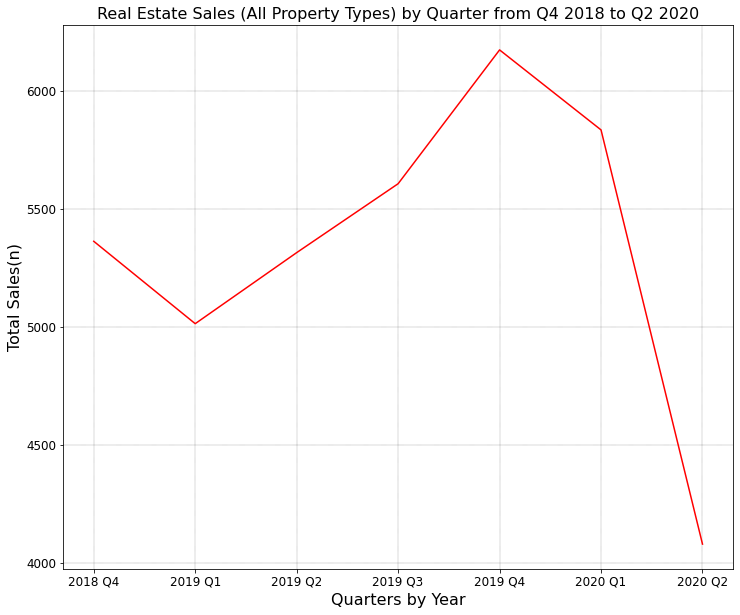

In [22]:
#Plot Quarterly Sales Trends using a line graph

qt_sales_list = wa_realestate_qt_ct_df['Sales'].to_list()
qt_lbl_lst = ["2018 Q4","2019 Q1","2019 Q2","2019 Q3","2019 Q4","2020 Q1","2020 Q2"]

plt.figure(figsize=(12,10))
plt.plot(qt_lbl_lst, qt_sales_list, color='red')
plt.grid(color='k', linestyle='--', linewidth=0.2)
plt.xlabel('Quarters by Year', fontsize = 16)
plt.ylabel('Total Sales(n)', fontsize = 16)
plt.title('Real Estate Sales (All Property Types) by Quarter from Q4 2018 to Q2 2020', fontsize = 16)
plt.savefig('output/line_re_sales_byqt_Q42018_to_Q22020.jpeg')

plt.show()

# Break Dataframe by Quarter and Count by Categroy 

In [23]:
wa_realestate_qt_type_ct_df = wa_realestate_df.groupby(['year','quarter','property_type'])['date_sold'].count().reset_index()
wa_realestate_qt_type_ct_df = wa_realestate_qt_type_ct_df[3:-3]
wa_realestate_qt_type_ct_df.columns = ["Year","Quarter","Property","Sales"]
wa_realestate_qt_type_ct_df

wa_realestate_qt_type_ct_df.to_csv("output/propertytype_sales_by_quarter.csv", encoding='utf-8', index=False)

In [24]:
#Break into 3 dataframes by type

dwellings_qt = wa_realestate_qt_type_ct_df[wa_realestate_qt_type_ct_df.Property == 'house']
townhouses_qt = wa_realestate_qt_type_ct_df[wa_realestate_qt_type_ct_df.Property == 'townhouse']
apartments_qt = wa_realestate_qt_type_ct_df[wa_realestate_qt_type_ct_df.Property == 'unit']


Text(0.5, 1.0, 'Real Estate Sales by Quarter from Q4 2018 to Q2 2020')

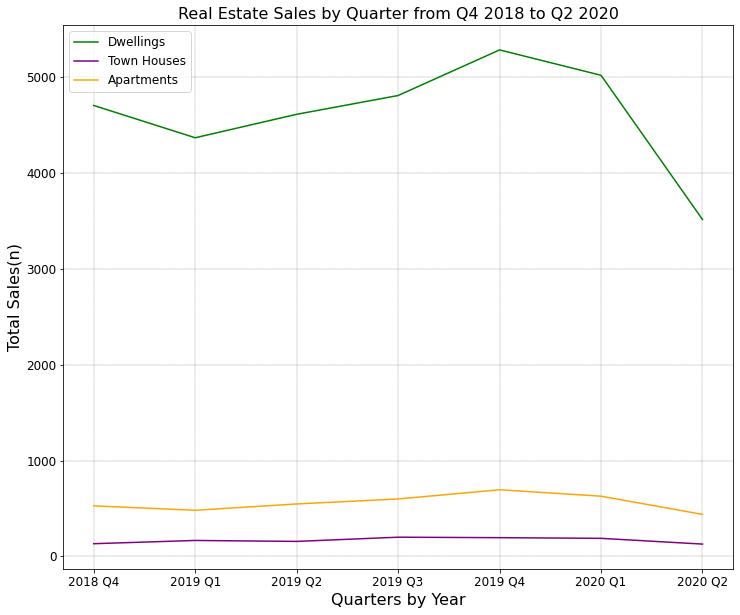

In [25]:
#Plot Line Graphs by Category

plt.figure(figsize=(12,10))
plt.plot(qt_lbl_lst, dwellings_qt['Sales'], label='Dwellings', color='green')
plt.plot(qt_lbl_lst, townhouses_qt['Sales'], label='Town Houses', color='purple')
plt.plot(qt_lbl_lst, apartments_qt['Sales'], label='Apartments', color='orange')
plt.xlabel('Quarters by Year', fontsize = 16)
plt.ylabel('Total Sales(n)', fontsize = 16)
plt.grid(color='k', linestyle='--', linewidth=0.2)
plt.legend()
plt.savefig('output/line_re_sales_cat_byqt_Q42018_to_Q22020.jpeg')
plt.title('Real Estate Sales by Quarter from Q4 2018 to Q2 2020', fontsize = 16)

# Break Dataframe down by sales per month

In [26]:
wa_realestate_mn_ct_df = wa_realestate_df.groupby(['year','month'])['date_sold'].count().reset_index()
wa_realestate_mn_ct_df = wa_realestate_mn_ct_df[1:-1]
wa_realestate_mn_ct_df.columns = ["Year","Month","Sales"]
wa_realestate_mn_ct_df

,Year,Month,Sales
1,2018,10,1831
2,2018,11,1912
3,2018,12,1622
4,2019,1,1636
5,2019,2,1599
6,2019,3,1781
7,2019,4,1714
8,2019,5,1854
9,2019,6,1749
10,2019,7,1939


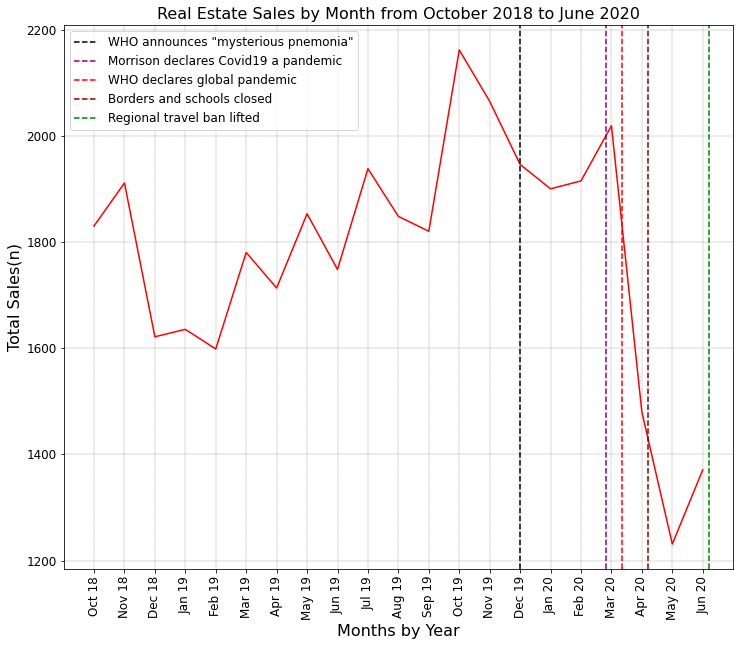

In [27]:
plt.figure(figsize=(12,10))

mth_lbl_lst = ['Oct 18','Nov 18','Dec 18','Jan 19','Feb 19','Mar 19','Apr 19','May 19','Jun 19','Jul 19','Aug 19','Sep 19','Oct 19','Nov 19','Dec 19','Jan 20','Feb 20','Mar 20','Apr 20','May 20','Jun 20']

plt.plot(mth_lbl_lst, wa_realestate_mn_ct_df['Sales'], color='red')
plt.grid(color='k', linestyle='--', linewidth=0.2)
plt.xlabel('Months by Year', fontsize = 16)
plt.ylabel('Total Sales(n)', fontsize = 16)
plt.xticks(rotation=90)
# x coordinates for the lines (to calculate the small gradients divided the day by the total number of days in month)
plt.axvline(x=13.99, label='WHO announces "mysterious pnemonia"',linestyle='--', color = 'k')
plt.axvline(x=16.82, label='Morrison declares Covid19 a pandemic',linestyle='--', color = 'purple') 
plt.axvline(x=17.35, label='WHO declares global pandemic',linestyle='--', color = 'r') 
plt.axvline(x=18.2, label='Borders and schools closed',linestyle='--', color = 'maroon')  
plt.axvline(x=20.2, label='Regional travel ban lifted',linestyle='--', color = 'green')
plt.legend()
plt.title('Real Estate Sales by Month from October 2018 to June 2020', fontsize = 16)
plt.savefig('output/line_re_sales_bymn_102018_to_072020.jpeg')
plt.show()

# Break Dataframe down into sales per category per month

In [28]:
#Create and organize a monthly count dataframe with property types

wa_realestate_mn_ct_type_df = wa_realestate_df.groupby(['year','month','property_type'])['date_sold'].count().reset_index()
wa_realestate_mn_ct_type_df = wa_realestate_mn_ct_type_df[3:-3]
wa_realestate_mn_ct_type_df.columns = ["Year","Month","Property","Sales"]
wa_realestate_mn_ct_type_df

,Year,Month,Property,Sales
3,2018,10,house,1600
4,2018,10,townhouse,43
5,2018,10,unit,188
6,2018,11,house,1704
7,2018,11,townhouse,46
...,...,...,...,...
61,2020,5,townhouse,33
62,2020,5,unit,112
63,2020,6,house,1173
64,2020,6,townhouse,42


In [29]:
#Create 3 Separate Data Frames for Sales Categories

dwellings_mn = wa_realestate_mn_ct_type_df[wa_realestate_mn_ct_type_df.Property == 'house']
townhouses_mn = wa_realestate_mn_ct_type_df[wa_realestate_mn_ct_type_df.Property == 'townhouse']
apartments_mn = wa_realestate_mn_ct_type_df[wa_realestate_mn_ct_type_df.Property == 'unit']

Text(0.5, 1.0, 'Real Estate Sales by Month from October 2018 to June 2020')

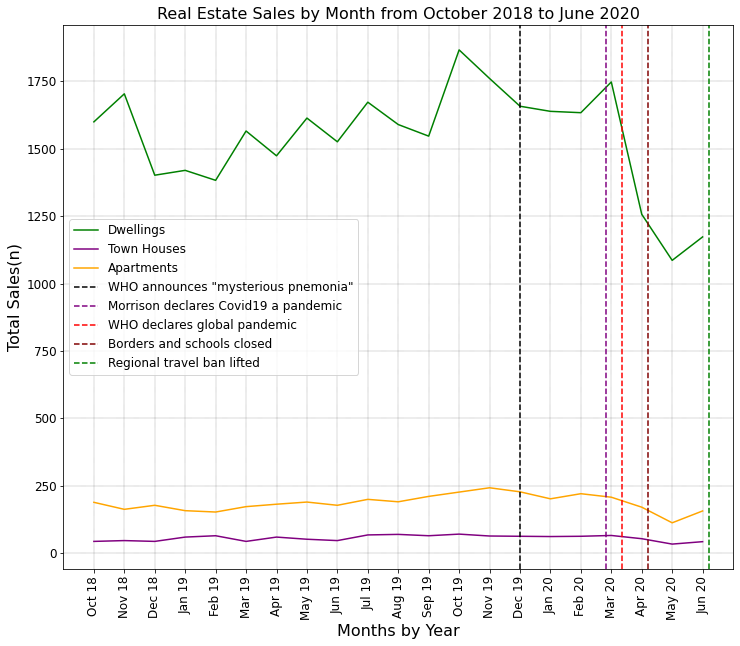

In [30]:
#Plot Line Graphs by Category

plt.figure(figsize=(12,10))
plt.plot(mth_lbl_lst, dwellings_mn['Sales'], label='Dwellings', color='green')
plt.plot(mth_lbl_lst, townhouses_mn['Sales'], label='Town Houses', color='purple')
plt.plot(mth_lbl_lst, apartments_mn['Sales'], label='Apartments', color='orange')
plt.xlabel('Months by Year', fontsize = 16)
plt.ylabel('Total Sales(n)', fontsize = 16)
plt.grid(color='k', linestyle='--', linewidth=0.2)
plt.xticks(rotation=90)
# x coordinates for the lines (to calculate the small gradients divided the day by the total number of days in month)
plt.axvline(x=13.99, label='WHO announces "mysterious pnemonia"',linestyle='--', color = 'k')
plt.axvline(x=16.82, label='Morrison declares Covid19 a pandemic',linestyle='--', color = 'purple') 
plt.axvline(x=17.35, label='WHO declares global pandemic',linestyle='--', color = 'r') 
plt.axvline(x=18.2, label='Borders and schools closed',linestyle='--', color = 'maroon')  
plt.axvline(x=20.2, label='Regional travel ban lifted',linestyle='--', color = 'green')
plt.legend()
plt.savefig('output/line_re_sales_cat_bymn_102018_to_072020.jpeg')
plt.title('Real Estate Sales by Month from October 2018 to June 2020', fontsize = 16)

# Top 10 Performing Suburbs by Sales (n) Per Quarter

In [31]:
qt_lbl_lst

['2018 Q4', '2019 Q1', '2019 Q2', '2019 Q3', '2019 Q4', '2020 Q1', '2020 Q2']

In [32]:
wa_realestate_df

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,quarter,month,year
54789,2019-02-06,120000.0,Kelmscott,Perth,WA,-32.118235,116.018271,3,unit,WA2915,WA321,1,2,2019
54790,2019-05-24,NaN,Kelmscott,Perth,WA,-32.117147,116.011979,3,unit,WA2915,WA321,2,5,2019
54791,2020-02-27,329000.0,Kelmscott,Perth,WA,-32.120796,116.019722,3,unit,WA2915,WA321,1,2,2020
54792,2020-06-23,159000.0,Kelmscott,Perth,WA,-32.110688,116.014602,2,unit,WA2915,WA321,2,6,2020
54793,2019-04-22,NaN,Piara Waters,Perth,WA,-32.137776,115.928161,3,unit,WA3112,WA321,2,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313743,2020-03-21,870000.0,Burswood,Perth,WA,-31.957961,115.895464,4,townhouse,WA3151,WA316,1,3,2020
313744,2020-05-11,NaN,Burswood,Perth,WA,-31.969290,115.896280,3,townhouse,WA3151,WA316,2,5,2020
313745,2019-04-20,NaN,Lathlain,Perth,WA,-31.970371,115.903924,3,townhouse,WA3334,WA316,2,4,2019
313746,2019-07-19,NaN,Lathlain,Perth,WA,-31.974653,115.906999,3,townhouse,WA3334,WA316,3,7,2019


# Breaking Dataframe into Highest Selling Suburbs by Quarter

In [33]:
wa_realestate_qt_sb_type_df = wa_realestate_df.groupby(['year', 'quarter','suburb']).agg({'property_type':'count'}).reset_index()
wa_realestate_qt_sb_type_df.columns = ["Year","Quarter","Suburb","Sales"]

wa_realestate_qt_sb_type_df.shape

(2607, 4)

# Issues

Struggled to output desired variables without splitting out the dataframes.

# 2018

In [34]:
wa_realestate_qt_sb_type_2018_df= wa_realestate_qt_sb_type_df.loc[wa_realestate_qt_sb_type_df['Year'] == 2018]

In [35]:
wa_realestate_qt_sb_type_2018_4_df = wa_realestate_qt_sb_type_2018_df.loc[wa_realestate_qt_sb_type_2018_df['Quarter'] == 4]
wa_realestate_qt_sb_type_2018_4_dfp = wa_realestate_qt_sb_type_2018_4_df[:10]
wa_realestate_qt_sb_type_2018_4_dfp

,Year,Quarter,Suburb,Sales
274,2018,4,Alexander Heights,22
275,2018,4,Alfred Cove,9
276,2018,4,Alkimos,11
277,2018,4,Applecross,18
278,2018,4,Ardross,13
279,2018,4,Armadale,27
280,2018,4,Ascot,9
281,2018,4,Ashby,10
282,2018,4,Ashfield,6
283,2018,4,Attadale,24


# 2019

In [36]:
wa_realestate_qt_sb_type_2019_df= wa_realestate_qt_sb_type_df.loc[wa_realestate_qt_sb_type_df['Year'] == 2019]

In [37]:
wa_realestate_qt_sb_type_2019_1_df = wa_realestate_qt_sb_type_2019_df.loc[wa_realestate_qt_sb_type_2019_df['Quarter'] == 1]
wa_realestate_qt_sb_type_2019_1_dfp = wa_realestate_qt_sb_type_2019_1_df.nlargest(10, ['Sales'])
wa_realestate_qt_sb_type_2019_1_dfp

,Year,Quarter,Suburb,Sales
591,2019,1,Baldivis,96
762,2019,1,Morley,78
816,2019,1,Scarborough,67
628,2019,1,Canning Vale,63
660,2019,1,Dianella,59
644,2019,1,Como,52
684,2019,1,Gosnells,52
751,2019,1,Maylands,51
598,2019,1,Bayswater,49
829,2019,1,South Perth,49


In [38]:
wa_realestate_qt_sb_type_2019_2_df = wa_realestate_qt_sb_type_2019_df.loc[wa_realestate_qt_sb_type_2019_df['Quarter'] == 2]
wa_realestate_qt_sb_type_2019_2_dfp = wa_realestate_qt_sb_type_2019_2_df.nlargest(10, ['Sales'])
wa_realestate_qt_sb_type_2019_2_dfp

,Year,Quarter,Suburb,Sales
892,2019,2,Baldivis,100
1140,2019,2,Thornlie,78
930,2019,2,Canning Vale,69
970,2019,2,Ellenbrook,67
1114,2019,2,Scarborough,66
960,2019,2,Dianella,62
1051,2019,2,Maylands,55
965,2019,2,East Perth,52
1061,2019,2,Morley,52
1115,2019,2,Secret Harbour,51


In [39]:
wa_realestate_qt_sb_type_2019_3_df = wa_realestate_qt_sb_type_2019_df.loc[wa_realestate_qt_sb_type_2019_df['Quarter'] == 3]
wa_realestate_qt_sb_type_2019_3_dfp = wa_realestate_qt_sb_type_2019_3_df.nlargest(10, ['Sales'])
wa_realestate_qt_sb_type_2019_3_dfp

,Year,Quarter,Suburb,Sales
1191,2019,3,Baldivis,106
1228,2019,3,Canning Vale,99
1416,2019,3,Scarborough,73
1260,2019,3,Dianella,67
1265,2019,3,East Perth,61
1270,2019,3,Ellenbrook,61
1364,2019,3,Morley,59
1244,2019,3,Como,54
1226,2019,3,Byford,53
1429,2019,3,South Perth,53


In [40]:
wa_realestate_qt_sb_type_2019_4_df = wa_realestate_qt_sb_type_2019_df.loc[wa_realestate_qt_sb_type_2019_df['Quarter'] == 4]
wa_realestate_qt_sb_type_2019_4_dfp = wa_realestate_qt_sb_type_2019_4_df.nlargest(10, ['Sales'])
wa_realestate_qt_sb_type_2019_4_dfp

,Year,Quarter,Suburb,Sales
1493,2019,4,Baldivis,119
1531,2019,4,Canning Vale,84
1721,2019,4,Scarborough,78
1747,2019,4,Thornlie,73
1573,2019,4,Ellenbrook,72
1714,2019,4,Rockingham,72
1704,2019,4,Perth,69
1734,2019,4,South Perth,69
1563,2019,4,Dianella,68
1667,2019,4,Morley,63


In [41]:
wa_realestate_qt_sb_type_2020_df= wa_realestate_qt_sb_type_df.loc[wa_realestate_qt_sb_type_df['Year'] == 2020]

In [42]:
wa_realestate_qt_sb_type_2020_1_df = wa_realestate_qt_sb_type_2020_df.loc[wa_realestate_qt_sb_type_2020_df['Quarter'] == 1]
wa_realestate_qt_sb_type_2020_1_dfp = wa_realestate_qt_sb_type_2020_1_df.nlargest(10, ['Sales'])
wa_realestate_qt_sb_type_2020_1_dfp

,Year,Quarter,Suburb,Sales
1798,2020,1,Baldivis,114
2023,2020,1,Scarborough,84
1836,2020,1,Canning Vale,80
1867,2020,1,Dianella,72
1970,2020,1,Morley,70
2016,2020,1,Rockingham,69
1851,2020,1,Como,55
1959,2020,1,Maylands,54
1869,2020,1,Duncraig,51
1877,2020,1,Ellenbrook,51


In [43]:
wa_realestate_qt_sb_type_2020_2_df = wa_realestate_qt_sb_type_2020_df.loc[wa_realestate_qt_sb_type_2020_df['Quarter'] == 2]
wa_realestate_qt_sb_type_2020_2_dfp = wa_realestate_qt_sb_type_2020_2_df.nlargest(10, ['Sales'])
wa_realestate_qt_sb_type_2020_2_dfp

,Year,Quarter,Suburb,Sales
2100,2020,2,Baldivis,91
2180,2020,2,Ellenbrook,63
2138,2020,2,Canning Vale,61
2170,2020,2,Dianella,51
2134,2020,2,Butler,48
2324,2020,2,Scarborough,42
2172,2020,2,Duncraig,41
2350,2020,2,Thornlie,41
2358,2020,2,Wanneroo,41
2150,2020,2,Claremont,39


# Dead End


# Sale Price to Measure performance

In [44]:
#I dont know why I had to delete the first two columns to be able to remame the mean and median prices but it worked.

wa_realestate_mn_sb_type_df_finm = wa_realestate_df.dropna(how='any')
wa_realestate_mn_sb_type_df_finm = wa_realestate_mn_sb_type_df_finm.groupby(['year', 'month']).agg({'price':['mean','median']}).reset_index()
wa_realestate_mn_sb_type_df_finm = wa_realestate_mn_sb_type_df_finm[1:-1]
del wa_realestate_mn_sb_type_df_finm['year']
del wa_realestate_mn_sb_type_df_finm['month']
wa_realestate_mn_sb_type_df_finm.columns = ['mean','median']
wa_realestate_mn_sb_type_df_finm

,mean,median
1,559450.116692,484800.0
2,585345.856820,492000.0
3,596521.968724,487500.0
4,546076.122877,466000.0
5,554200.670802,470000.0
6,539047.459655,462000.0
7,562667.250774,475000.0
8,533636.842549,450000.0
9,551155.408183,450000.0
10,556409.660974,470000.0


Text(0.5, 1.0, 'Average and Median Price by Month from October 2018 to June 2020')

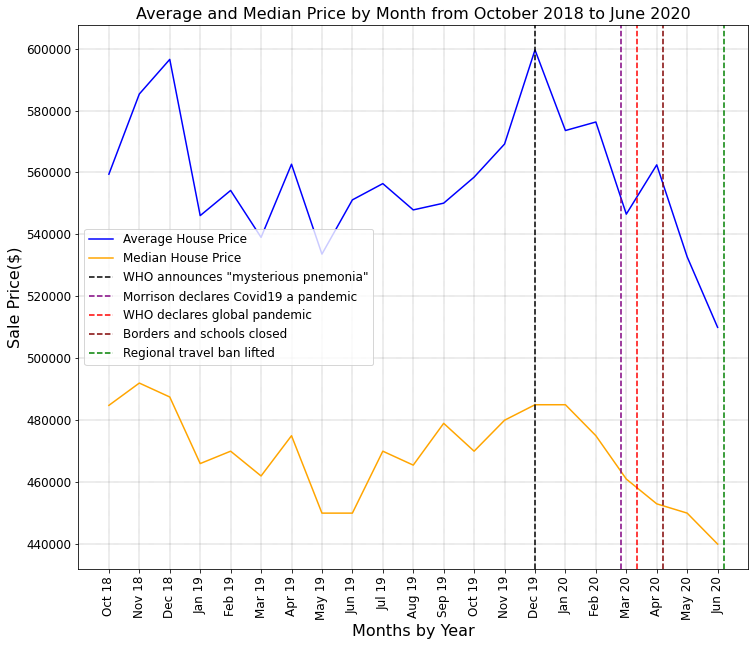

In [51]:
plt.figure(figsize=(12,10))
plt.plot(mth_lbl_lst, wa_realestate_mn_sb_type_df_finm['mean'], label='Average House Price', color='blue')
plt.plot(mth_lbl_lst, wa_realestate_mn_sb_type_df_finm['median'], label='Median House Price', color='orange')
plt.xlabel('Months by Year', fontsize = 16)
plt.ylabel('Sale Price($)', fontsize = 16)
plt.grid(color='k', linestyle='--', linewidth=0.2)
plt.xticks(rotation=90)
# x coordinates for the lines (to calculate the small gradients divided the day by the total number of days in month)
plt.axvline(x=13.99, label='WHO announces "mysterious pnemonia"',linestyle='--', color = 'k')
plt.axvline(x=16.82, label='Morrison declares Covid19 a pandemic',linestyle='--', color = 'purple') 
plt.axvline(x=17.35, label='WHO declares global pandemic',linestyle='--', color = 'r') 
plt.axvline(x=18.2, label='Borders and schools closed',linestyle='--', color = 'maroon')  
plt.axvline(x=20.2, label='Regional travel ban lifted',linestyle='--', color = 'green')
plt.legend()
plt.savefig('output/line_re_sales_medmean_bymn_102018_to_072020.jpeg')
plt.title('Average and Median Price by Month from October 2018 to June 2020', fontsize = 16)

# Percentage Changes Between Quarter 2 2019 and Quarter 2 2020

In [46]:
wa_realestate_qt_sb_type_2019_2_df
wa_realestate_qt_sb_type_2019_2_df.columns = ["Year","Month","Suburb","Sales_Q22019"]
wa_realestate_qt_sb_type_2019_2_df = wa_realestate_qt_sb_type_2019_2_df.drop(columns=['Year', 'Month'])
wa_realestate_qt_sb_type_2019_2_df

,Suburb,Sales_Q22019
878,Alexander Heights,17
879,Alfred Cove,13
880,Alkimos,25
881,Applecross,19
882,Ardross,14
...,...,...
1171,Woodvale,31
1172,Wooroloo,1
1173,Yanchep,37
1174,Yangebup,23


In [47]:
wa_realestate_qt_sb_type_2020_2_df
wa_realestate_qt_sb_type_2020_2_df.columns = ["Year","Month","Suburb","Sales_Q22020"]
wa_realestate_qt_sb_type_2020_2_df = wa_realestate_qt_sb_type_2020_2_df.drop(columns=['Year', 'Month'])
wa_realestate_qt_sb_type_2020_2_df

,Suburb,Sales_Q22020
2086,Alexander Heights,9
2087,Alfred Cove,6
2088,Alkimos,22
2089,Applecross,17
2090,Ardross,11
...,...,...
2380,Wooroloo,4
2381,Wungong,1
2382,Yanchep,32
2383,Yangebup,19


In [48]:
#Merge Dataframes By Suburb Dropping those without a match

wa_re_qt_sb_to_20_2_mg = pd.merge(wa_realestate_qt_sb_type_2019_2_df, wa_realestate_qt_sb_type_2020_2_df)
wa_re_qt_sb_to_20_2_mg

,Suburb,Sales_Q22019,Sales_Q22020
0,Alexander Heights,17,9
1,Alfred Cove,13,6
2,Alkimos,25,22
3,Applecross,19,17
4,Ardross,14,11
...,...,...,...
285,Woodvale,31,16
286,Wooroloo,1,4
287,Yanchep,37,32
288,Yangebup,23,19


In [49]:
#Define Percentage Calculation Function

def percCalc(x,y):
    if x<1e-9:
        return 0
    else:
        return (y - x)*100/x

In [50]:
#Calculate Percentage Changes Between Q2 2019 and Q2 2020

wa_re_qt_sb_to_20_2_mg['%change'] = wa_re_qt_sb_to_20_2_mg[['Sales_Q22019','Sales_Q22020']].apply(lambda x: percCalc(x['Sales_Q22019'], x['Sales_Q22020']), axis=1)
wa_re_qt_sb_to_20_2_mg = wa_re_qt_sb_to_20_2_mg.round(2)
wa_re_qt_sb_to_20_2_mg = wa_re_qt_sb_to_20_2_mg.nlargest(50, ['%change'])
wa_re_qt_sb_to_20_2_mg

,Suburb,Sales_Q22019,Sales_Q22020,%change
47,Bushmead,1,4,300.00
286,Wooroloo,1,4,300.00
151,Koondoola,1,3,200.00
7,Ashby,3,8,166.67
160,Lockridge,5,12,140.00
79,Darling Downs,1,2,100.00
233,Serpentine,2,4,100.00
277,Whitby,1,2,100.00
103,Golden Bay,11,21,90.91
39,Brabham,10,19,90.00
